In [1]:
import pandas as pd


comp_data = 'compiled_upright_torque_july4.dat'

df = pd.read_csv(comp_data, sep=',')
df

,rod_id,trial,measurement_index,point_index,value
0,Rod3,N2,0,0,-0.00688
1,Rod3,N2,0,1,-0.00737
2,Rod3,N2,0,2,-0.00786
3,Rod3,N2,0,3,-0.00951
4,Rod3,N2,0,4,-0.01312
...,...,...,...,...,...
3695,Rod3,N1,99,2,0.00594
3696,Rod3,N1,99,3,0.00808
3697,Rod3,N1,99,4,0.00594
3698,Rod3,N1,99,5,0.00463


In [2]:
rod_chars = 'dataTorque/rod-lenght.txt'
dfC = pd.read_csv(rod_chars)
# Filter out broken rods (optional)
dfC = dfC[dfC['Rod'].str.contains("Rod") & ~dfC['Rod'].str.contains("not working|broken", case=False)].copy()

# Standardize rod_id
dfC['rod_id'] = dfC['Rod'].str.extract(r'(Rod\d+)')
# First merge main df with rod characteristics
df_merged = pd.merge(df, dfC.drop(columns=['Rod']), on='rod_id', how='left')
df_merged


,rod_id,trial,measurement_index,point_index,value,material,lenght,diammeter
0,Rod3,N2,0,0,-0.00688,al,182mm,1.6mm
1,Rod3,N2,0,1,-0.00737,al,182mm,1.6mm
2,Rod3,N2,0,2,-0.00786,al,182mm,1.6mm
3,Rod3,N2,0,3,-0.00951,al,182mm,1.6mm
4,Rod3,N2,0,4,-0.01312,al,182mm,1.6mm
...,...,...,...,...,...,...,...,...
3695,Rod3,N1,99,2,0.00594,al,182mm,1.6mm
3696,Rod3,N1,99,3,0.00808,al,182mm,1.6mm
3697,Rod3,N1,99,4,0.00594,al,182mm,1.6mm
3698,Rod3,N1,99,5,0.00463,al,182mm,1.6mm


In [8]:
position_map = {
    0: 0,
    1: 100,
    2: 90,
    3: 80,
    4: 70,
    5: 60,
    6: 50,
    7: 40,
    # Add more if needed
}


summary_df = (
    df_merged
    .groupby(['material','rod_id','trial', 'point_index'])
    .agg(
       mean_voltage=('value', 'mean'),
       std_voltage=('value', 'std')
    )
    .reset_index()
)
summary_df['position-from-center_mm'] = summary_df['point_index'].map(position_map)
  # X axis

# Optionally reorder columns
summary_df = summary_df[['material','rod_id','trial', 'point_index', 'position-from-center_mm', 'mean_voltage', 'std_voltage']]
# Strip whitespace and lowercase
summary_df['material'] = summary_df['material'].str.strip().str.lower()


summary_df

,material,rod_id,trial,point_index,position-from-center_mm,mean_voltage,std_voltage
0,al,Rod3,N1,0,0,0.000451,0.000133
1,al,Rod3,N1,1,100,0.004979,0.000146
2,al,Rod3,N1,2,90,0.006216,0.000135
3,al,Rod3,N1,3,80,0.007898,0.000121
4,al,Rod3,N1,4,70,0.005905,0.000133
5,al,Rod3,N1,5,60,0.004607,0.000134
6,al,Rod3,N1,6,50,0.006644,0.000130
7,al,Rod3,N2,0,0,-0.007051,0.000153
8,al,Rod3,N2,1,100,-0.007409,0.000119
9,al,Rod3,N2,2,90,-0.007930,0.000114


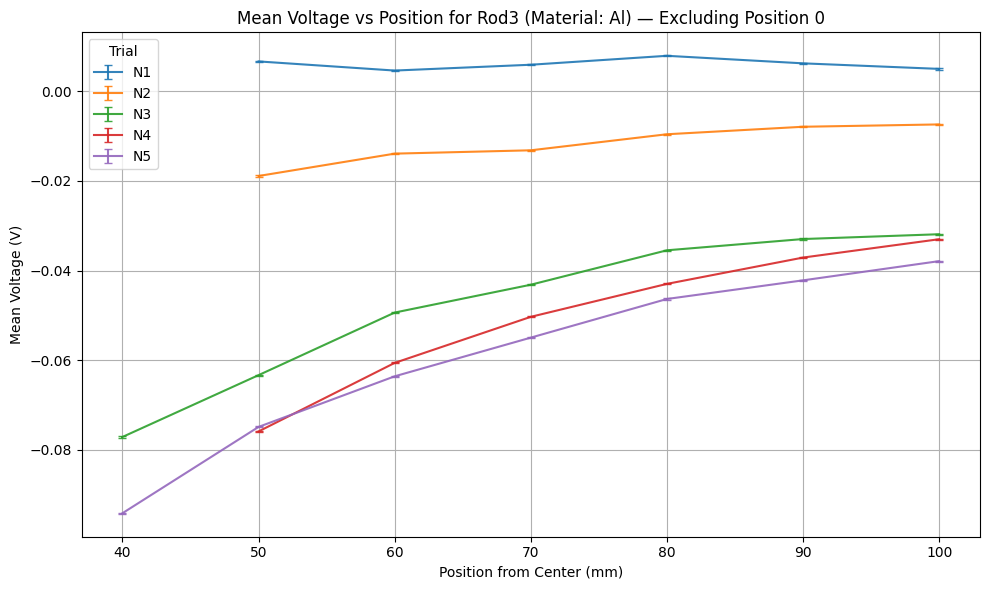

In [22]:
import matplotlib.pyplot as plt

# Filter out position 0
filtered_df = summary_df[summary_df["position-from-center_mm"] != 0]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Group by each trial (N1–N5)
for trial, group in filtered_df.groupby("trial"):
    ax.errorbar(
        group["position-from-center_mm"],
        group["mean_voltage"],
        yerr=group["std_voltage"],
        label=trial,
        fmt='-',      # Line only, no marker
        capsize=3,
        alpha=0.9
    )

# Style
ax.set_title("Mean Voltage vs Position for Rod3 (Material: Al) — Excluding Position 0")
ax.set_xlabel("Position from Center (mm)")
ax.set_ylabel("Mean Voltage (V)")
ax.grid(True)
ax.legend(title="Trial", loc="best", frameon=True)

plt.tight_layout()
plt.show()


In [11]:
from scipy.optimize import curve_fit
import numpy as np

def linear_model(x, m, b):
    return m * x + b
    
def compute_sigma_eff(x_values, sigma_x, sigma_y, model_func, params):
    """
    Computes the effective standard deviation incorporating uncertainties in both x and y.

    Parameters:
    - x_values (array-like): Independent variable values.
    - sigma_x (array-like): Uncertainties in x_values.
    - sigma_y (array-like): Uncertainties in y_values.
    - model_func (function): Function defining the model.
    - params (tuple): Parameters of the model.

    Returns:
    - sigma_eff (array-like): Effective uncertainty combining sigma_x and sigma_y.
    """
    # Compute the derivative df/dx numerically
    delta_x = 1e-6  # Small step for numerical differentiation
    df_dx = (model_func(x_values + delta_x, *params) - model_func(x_values - delta_x, *params)) / (2 * delta_x)

    # Compute effective variance
    sigma_eff_squared = sigma_y**2 + (df_dx * sigma_x)**2
    return np.sqrt(sigma_eff_squared)

def perform_curve_fit(x_values, y_values, sigma_x, sigma_y, model_func, initial_guess):
    """
    Performs curve fitting considering uncertainties in both x and y.

    Parameters:
    - x_values (array-like): Independent variable values (observed).
    - y_values (array-like): Dependent variable values (observed).
    - sigma_x (array-like): Uncertainties in x_values.
    - sigma_y (array-like): Uncertainties in y_values.
    - model_func (function): Function defining the model.
    - initial_guess (tuple): Initial guess for model parameters.

    Returns:
    - popt (array): Optimal values for the parameters.
    - pcov (2D array): The estimated covariance of popt.
    """
    # Perform initial fit without sigma_x
    popt, pcov = curve_fit(model_func, x_values, y_values, sigma=sigma_y, absolute_sigma=True, p0=initial_guess)

    # Compute effective sigma with the best-fit parameters
    sigma_eff = compute_sigma_eff(x_values, sigma_x, sigma_y, model_func, popt)

    # Refit using effective sigma
    popt, pcov = curve_fit(model_func, x_values, y_values, sigma=sigma_eff, absolute_sigma=True, p0=popt)

    return popt, pcov

def compute_chi_squared(x_values, y_values, sigma_x, sigma_y, model_func, params):
    """
    Computes chi-squared and reduced chi-squared, incorporating both y and x uncertainties.

    Parameters:
    - x_values (array-like): Independent variable values (observed).
    - y_values (array-like): Dependent variable values (observed).
    - sigma_x (array-like): Uncertainties in x_values.
    - sigma_y (array-like): Uncertainties in y_values.
    - model_func (function): Function defining the model. (linear)
    - params (tuple): Parameters of the model. (Linear is 2)

    Returns:
    - chi_squared (float): The chi-squared value.
    - chi_squared_red (float): The reduced chi-squared value.
    """
    # Compute fitted y-values using the model function
    y_fit_values = model_func(x_values, *params)

    # Compute effective sigma
    sigma_eff = compute_sigma_eff(x_values, sigma_x, sigma_y, model_func, params)

    # Compute chi-squared
    chi_squared = np.sum(((y_values - y_fit_values) ** 2) / sigma_eff**2)

    # Degrees of freedom
    dof = len(y_values) - len(params)

    # Reduced chi-squared
    chi_squared_red = chi_squared / dof

    #print("Chi-Squared:", chi_squared)
    #print("Reduced Chi-Squared:", chi_squared_red)

    return chi_squared, chi_squared_red


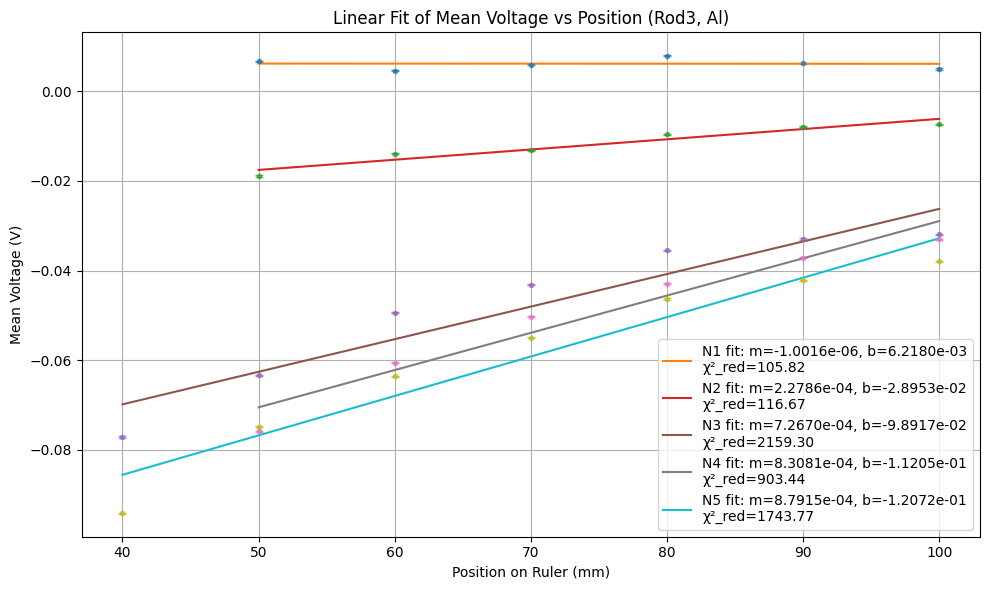

In [12]:
# Convert to numeric arrays
sigma_x = np.full_like(filtered_df["position-from-center_mm"], 0.5)  # assuming ±0.5 mm uncertainty

fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each trial
for trial, group in filtered_df.groupby("trial"):
    x = group["position-from-center_mm"].to_numpy()
    y = group["mean_voltage"].to_numpy()
    sy = group["std_voltage"].to_numpy()
    sx = sigma_x[:len(x)]  # consistent size

    # Fit
    initial_guess = (0.001, 0)  # reasonable for voltage/position
    popt, pcov = perform_curve_fit(x, y, sx, sy, linear_model, initial_guess)
    m, b = popt
    y_fit = linear_model(x, *popt)

    # Compute chi squared
    chi2, chi2_red = compute_chi_squared(x, y, sx, sy, linear_model, popt)

    # Plot data with error bars
    ax.errorbar(
        x, y, yerr=sy, fmt='o', label='_nolegend_', capsize=3,markersize=3, alpha=0.7
    )
    # Plot fit line
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit_line = linear_model(x_fit, *popt)
    ax.plot(x_fit, y_fit_line, label=f"{trial} fit: m={popt[0]:.4e}, b={popt[1]:.4e}\nχ²_red={chi2_red:.2f}")

# Labels and style
ax.set_title("Linear Fit of Mean Voltage vs Position (Rod3, Al)")
ax.set_xlabel("Position on Ruler (mm)")
ax.set_ylabel("Mean Voltage (V)")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [13]:
# Quadratic model
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

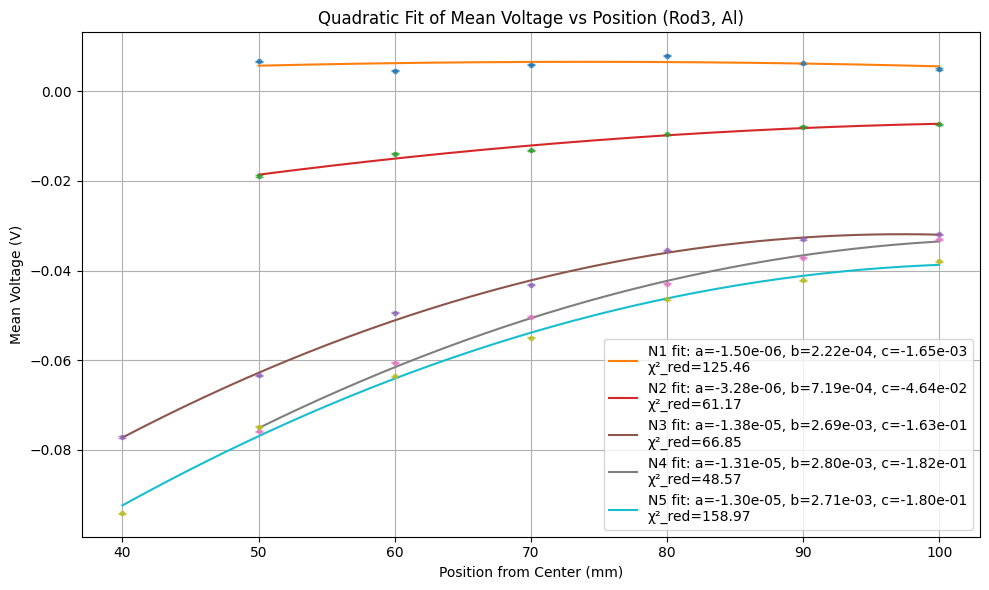

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter out position 0
filtered_df = summary_df[summary_df["position-from-center_mm"] != 0]

# Define uncertainty in x
sigma_x = np.full_like(filtered_df["position-from-center_mm"], 0.5)  # assumed ±0.5 mm

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Fit and plot each trial
for trial, group in filtered_df.groupby("trial"):
    x = group["position-from-center_mm"].to_numpy()
    y = group["mean_voltage"].to_numpy()
    sy = group["std_voltage"].to_numpy()
    sx = sigma_x[:len(x)]  # match size

    # Fit
    initial_guess = (1e-5, 1e-3, 0.0)
    popt, pcov = perform_curve_fit(x, y, sx, sy, quadratic_model, initial_guess)
    a, b, c = popt
    y_fit = quadratic_model(x, *popt)

    # Compute chi-squared
    chi2, chi2_red = compute_chi_squared(x, y, sx, sy, quadratic_model, popt)

    # Plot data with error bars
    ax.errorbar(x, y, yerr=sy, fmt='o', label='_nolegend_', capsize=3,markersize=3, alpha=0.7)

    # Plot fit line
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit_line = quadratic_model(x_fit, *popt)
    ax.plot(
        x_fit,
        y_fit_line,
        label=(
            f"{trial} fit: "
            f"a={a:.2e}, b={b:.2e}, c={c:.2e}\n"
            f"χ²_red={chi2_red:.2f}"
        )
    )

# Labels and styling
ax.set_title("Quadratic Fit of Mean Voltage vs Position (Rod3, Al)")
ax.set_xlabel("Position from Center (mm)")
ax.set_ylabel("Mean Voltage (V)")
ax.grid(True)
ax.legend()
plt.tight_layout()

plt.savefig('plots/al_upright_Quadratic_fit.png', dpi=300)

plt.show()


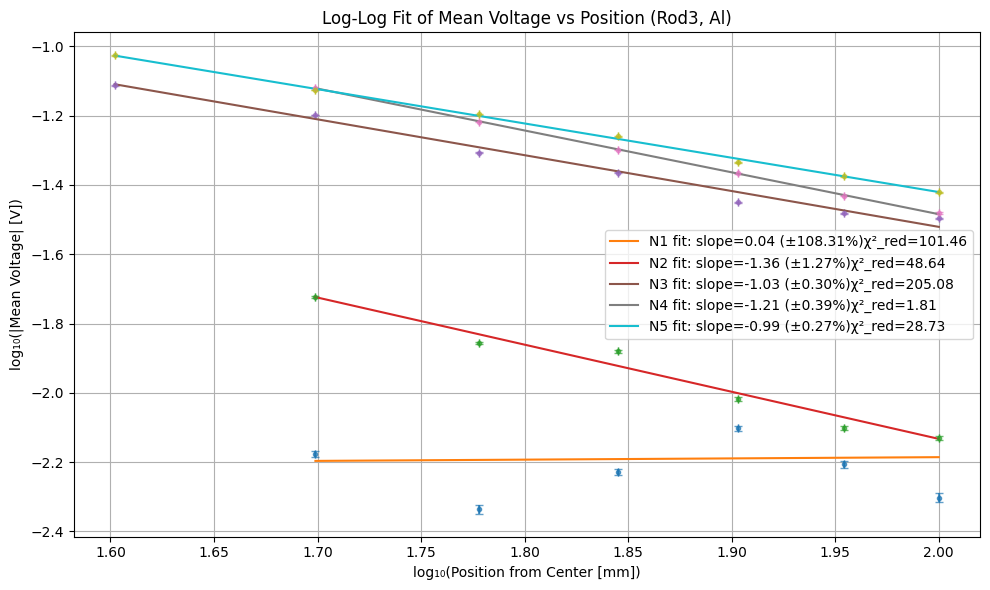

In [26]:
# Define uncertainty in x (before log)
sigma_x_raw = np.full_like(summary_df["position-from-center_mm"], 0.5)  # mm

# Setup figure
fig, ax = plt.subplots(figsize=(10, 6))

# Filter out position 0 and zero voltages (avoid log(0))
filtered_df = summary_df[(summary_df["position-from-center_mm"] > 0) & (summary_df["mean_voltage"] != 0)]

# Fit and plot each trial
for trial, group in filtered_df.groupby("trial"):
    x_raw = group["position-from-center_mm"].to_numpy()
    y_raw = np.abs(group["mean_voltage"].to_numpy())  # Use abs to avoid log of negative values
    sy_raw = group["std_voltage"].to_numpy()
    sx_raw = sigma_x_raw[:len(x_raw)]

    # Log-transform
    log_x = np.log10(x_raw)
    log_y = np.log10(y_raw)
    sigma_log_x = sx_raw / (x_raw * np.log(10))
    sigma_log_y = sy_raw / (y_raw * np.log(10))

    # Fit in log-log space
    initial_guess = (-1.0, 0.0)
    popt, pcov = perform_curve_fit(log_x, log_y, sigma_log_x, sigma_log_y, linear_model, initial_guess)
    slope, intercept = popt

    # Compute chi-squared
    chi2, chi2_red = compute_chi_squared(log_x, log_y, sigma_log_x, sigma_log_y, linear_model, popt)

    # Plot data
    ax.errorbar(
        log_x, log_y,
        yerr=sigma_log_y,
        xerr=sigma_log_x,
        fmt='o', label='_nolegend_', capsize=3, markersize=3, alpha=0.7
    )

    m = popt[0]  # slope
    m_err = np.sqrt(pcov[0, 0])  # standard error of slope
    percent_err = abs(m_err / m) * 100 if m != 0 else np.nan

    # Fit line
    x_fit = np.linspace(min(log_x), max(log_x), 200)
    y_fit_line = linear_model(x_fit, *popt)
    ax.plot(
        x_fit, y_fit_line,
        label=(
            f"{trial} fit: "
            f"slope={slope:.2f} (±{percent_err:.2f}%)"
            f"χ²_red={chi2_red:.2f}"
        )
    )

# Labels and styling
ax.set_title("Log-Log Fit of Mean Voltage vs Position (Rod3, Al)")
ax.set_xlabel("log₁₀(Position from Center [mm])")
ax.set_ylabel("log₁₀(|Mean Voltage| [V])")
ax.grid(True)
ax.legend()
plt.tight_layout()

# Save and display
plt.savefig('plots/al_upright_LogLog_fit.png', dpi=300)
plt.show()
